# Analysis of the simplicial contagion
Here we show how to simulate a simplicial social contagion on a random hypergraph and on a real-world social network

Source: 

[1] Iacopini I., Petri A., Barrat A., Latora V., _Simplicial models of social contagion_, Nature Communications *10*, 2485 (2019)

[2] Vanhems P., et al., _Estimating Potential Infection Transmission Routes in Hospital Wards Using Wearable Proximity Sensors_, PloS one, *8*(9), e73970 (2013)


## Overview

- Simulate simplicial contagion on synthetic hypergraphs.
- Compare dynamics with and without higher-order interactions.


## Setup


In [ ]:
import matplotlib as mpl

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "savefig.dpi": 150,
})


In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.generation import random_hypergraph
from hypergraphx.readwrite import load_hypergraph
from hypergraphx.dynamics.contagion import simplicial_contagion

np.random.seed(123)

In [2]:
# We first analyze the contagion on a random hypergraph
# We define the random hypergraph
N = 2000
E2 = N*10
E3 = N*2
hypergraph = random_hypergraph(N, {2 : E2, 3: E3})

In [4]:
# We set the contagion parameters and run the simulation with and without the simplicial term
mu = 0.05
beta = 0.75*mu/20
beta_D = 2.5*mu/6
I_0 = {}

for i in range(N):
    I_0[i] = 1*(np.random.random()<0.8)

T = 500

rho_t_simplicial = simplicial_contagion(hypergraph, I_0, T, beta, beta_D, mu)
rho_t_simple = simplicial_contagion(hypergraph, I_0, T, beta, 0, mu)

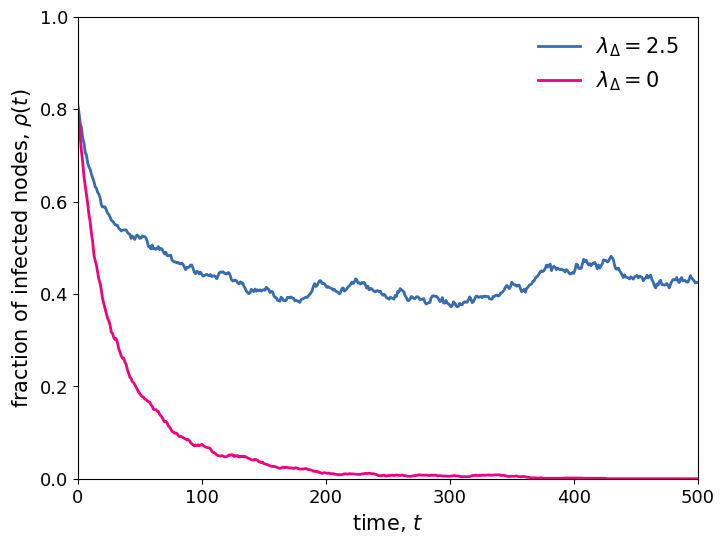

In [5]:
# We plot the results
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(range(T),rho_t_simplicial, 
        lw=2, c=plt.cm.Accent(4),
        label="$\lambda_\Delta = 2.5$")
ax.plot(range(T),rho_t_simple, 
        lw=2, c=plt.cm.Accent(5),
        label="$\lambda_\Delta = 0$")

ax.set_xlim(0,500)
ax.set_ylim(0,1)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_xlabel("time, $t$", fontsize=15)
ax.set_ylabel("fraction of infected nodes, $\\rho(t)$", fontsize=15)
ax.legend(fontsize=15, frameon=False)

plt.show()

In [9]:
# We now simulate the process on a real-world system
# We consider the face-to-face interactions occurring in a high school
high_school_hypergraph = load_hypergraph(file_name="../test_data/hs/hs.json")
high_school_hypergraph = high_school_hypergraph.get_edges(up_to=3, subhypergraph=True) ### FIX SUBHYPERGRAPH

average_degrees = [np.average(list(high_school_hypergraph.degree_sequence(size).values())) for size in [2,3]]
avg_k = average_degrees[0]
avg_k_D = average_degrees[1]

In [10]:
# We set the contagion parameters and run the simulation with and without the simplicial term
mu = 0.05
beta = 0.5*mu/avg_k
beta_D = 2*mu/avg_k_D

I_0 = {node: 1*(np.random.random()<0.5) for node in high_school_hypergraph.get_nodes()}
T = 500

rho_t_simplicial = simplicial_contagion(high_school_hypergraph, I_0, T, beta, beta_D, mu)
rho_t_simple = simplicial_contagion(high_school_hypergraph, I_0, T, beta, 0, mu)

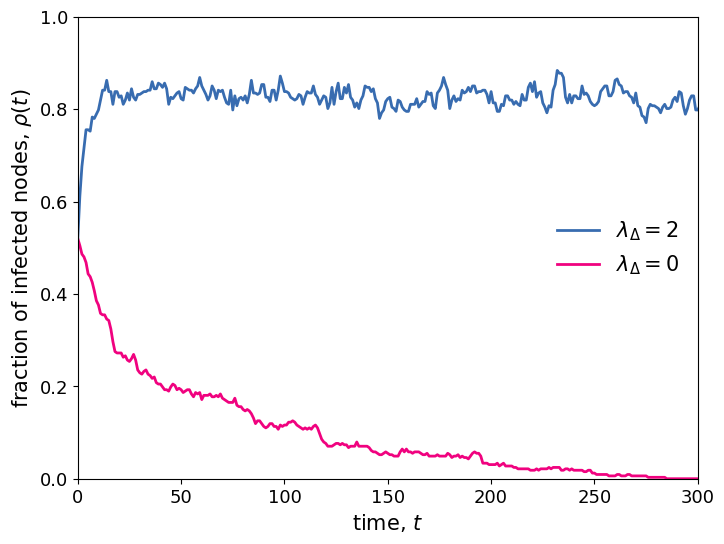

In [11]:
# We plot the results
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(range(T),rho_t_simplicial, 
        lw=2, c=plt.cm.Accent(4),
        label="$\lambda_\Delta = 2$")
ax.plot(range(T),rho_t_simple, 
        lw=2, c=plt.cm.Accent(5),
        label="$\lambda_\Delta = 0$")

ax.set_xlim(0,300)
ax.set_ylim(0,1)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_xlabel("time, $t$", fontsize=15)
ax.set_ylabel("fraction of infected nodes, $\\rho(t)$", fontsize=15)
ax.legend(fontsize=15, frameon=False)

plt.show()